In [1]:
import cartopy.crs as ccrs

Documentation for supported projections is at:

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

In [2]:
help(ccrs)

Help on module cartopy.crs in cartopy:

NAME
    cartopy.crs

DESCRIPTION
    The crs module defines Coordinate Reference Systems and the transformations
    between them.

CLASSES
    cartopy._crs.CRS(builtins.object)
        Projection
            AlbersEqualArea
            AzimuthalEquidistant
            Gnomonic
            InterruptedGoodeHomolosine
            LambertAzimuthalEqualArea
            LambertConformal
            Mercator
            Orthographic
            Sinusoidal
            Stereographic
                NorthPolarStereo
                SouthPolarStereo
            TransverseMercator
                OSGB
                OSNI
            UTM
                EuroPP
        RotatedGeodetic
    _CylindricalProjection(_RectangularProjection)
        PlateCarree
        RotatedPole
    _RectangularProjection(Projection)
        LambertCylindrical
        Miller
    _Satellite(Projection)
        Geostationary
        NearsidePerspective
    _WarpedRectangularProjec

In [3]:
ccrs.PlateCarree()

<IPython.core.display.Javascript object>


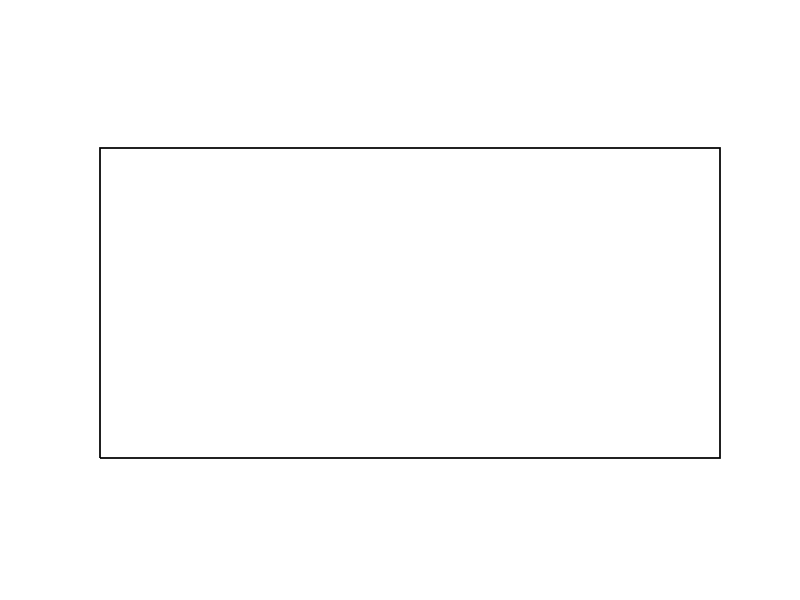

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

<IPython.core.display.Javascript object>


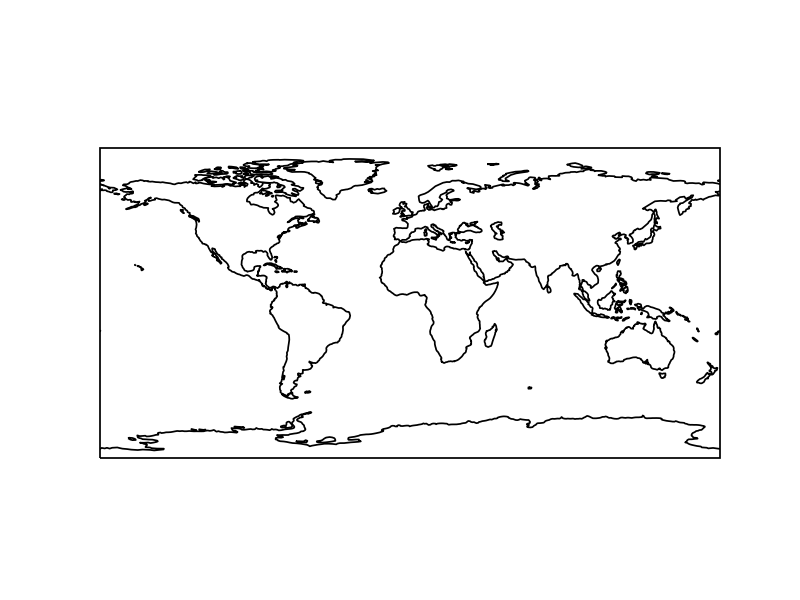

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90.))
ax.coastlines()

# exercise 2.1

Set up a PlateCarree centered on dateline instead of Prime Meridian

<IPython.core.display.Javascript object>


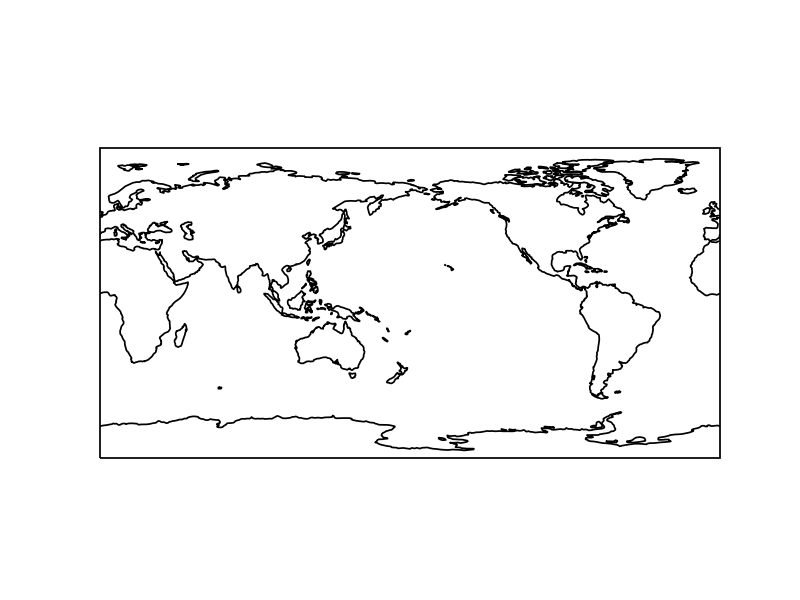

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180.)))
ax.coastlines()

# Specific useful GeoAxes methods


<IPython.core.display.Javascript object>


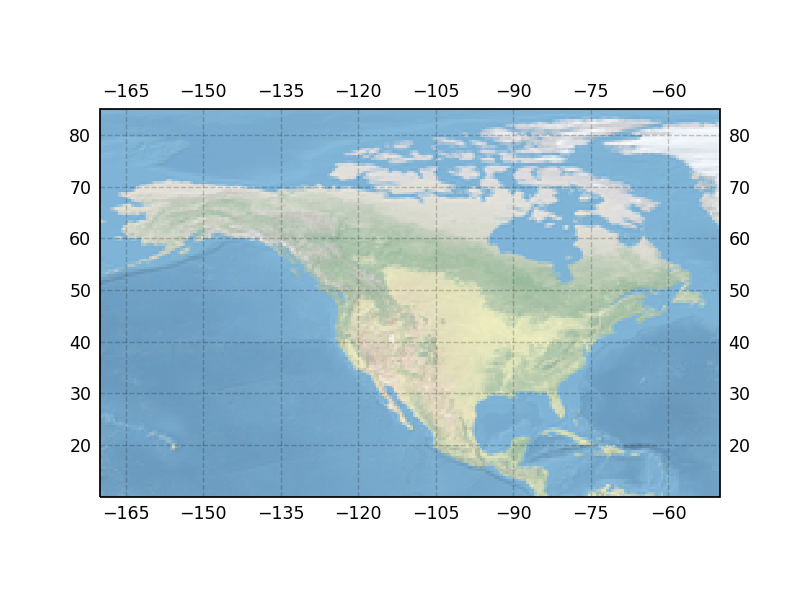

In [7]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-170, -50, 10, 80])
ax.gridlines(draw_labels=True,
            color='black', alpha=0.2, linestyle='--')
ax.stock_img()

# Get an alternative png image

In [8]:
%pwd


'/Users/brodzik/ipython_notebooks/cartopy'

In [9]:
img = plt.imread('/Users/brodzik/cartopy-tutorial/resources/natural-earth-2/global.png')
print(img.shape)

(1000, 2000, 3)


# Get a shapefile with US state boundaries

In [10]:
import fiona
import shapely.geometry as sgeom

shpfile = '/Users/brodzik/cartopy-tutorial/resources/states/states.shp'
with fiona.open(shpfile) as records:
    geometries = [sgeom.shape(shp['geometry'])
                 for shp in records]

<IPython.core.display.Javascript object>


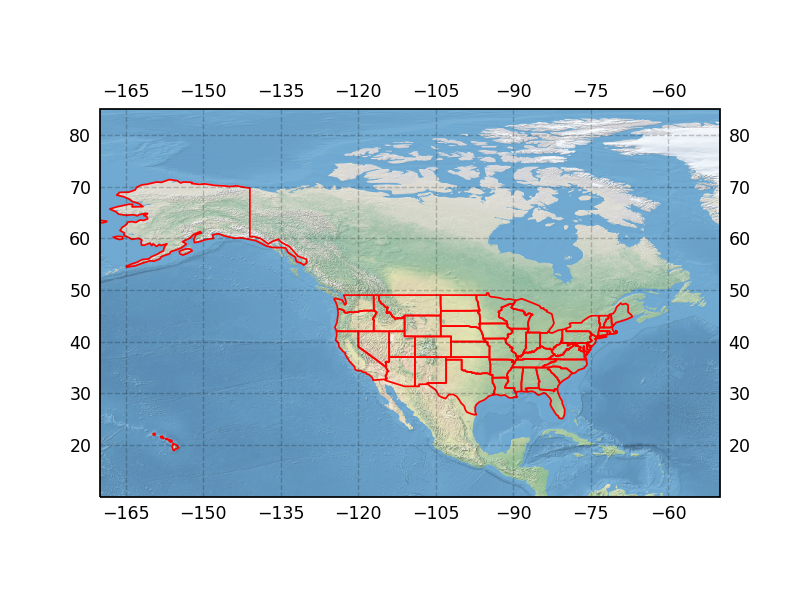

In [11]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-170, -50, 10, 80])
ax.gridlines(draw_labels=True,
            color='black', alpha=0.2, linestyle='--')

ax.imshow(img, origin='upper',
         extent=[-180, 180, -90, 90],
         transform=ccrs.PlateCarree())

ax.add_geometries(geometries, ccrs.PlateCarree(),
                 edgecolor='red', facecolor='none')

# Drawing different kinds of lines between NYC and Honolulu

<IPython.core.display.Javascript object>


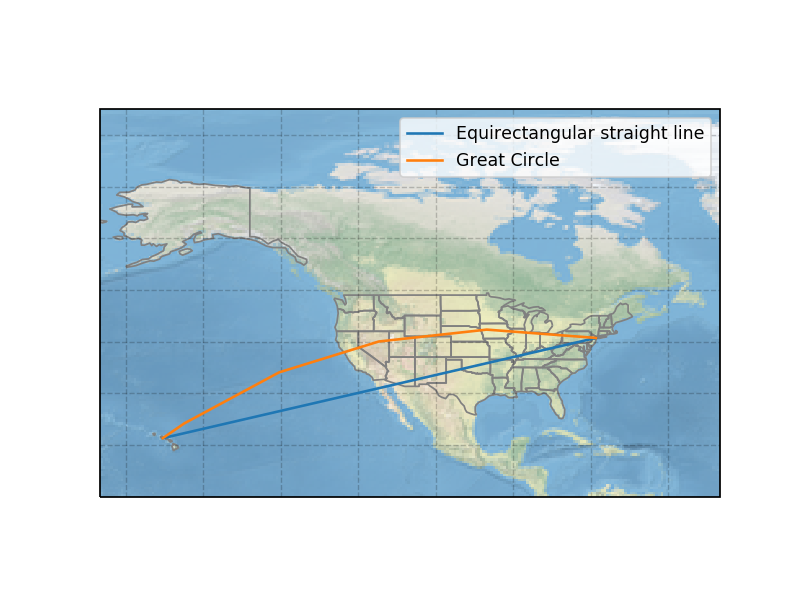

In [12]:
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)

def new_york_to_honolulu(ax):
    lons = [new_york['lon'], honolulu['lon']]
    lats = [new_york['lat'], honolulu['lat']]
    
    ax.plot(lons, lats, transform=ccrs.PlateCarree(),
           label='Equirectangular straight line')
    ax.plot(lons, lats, transform=ccrs.Geodetic(),
           label='Great Circle')
    
    ax.legend()
    
    
import cartopy.feature

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -50, 10, 80])

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()
ax.add_feature(cartopy.feature.STATES, edgecolor='gray')
new_york_to_honolulu(ax)

In [ ]:
# Change the projection to one that represents great circles out of NYC as straight lines
# --> polar stereo centered on NYC

<IPython.core.display.Javascript object>


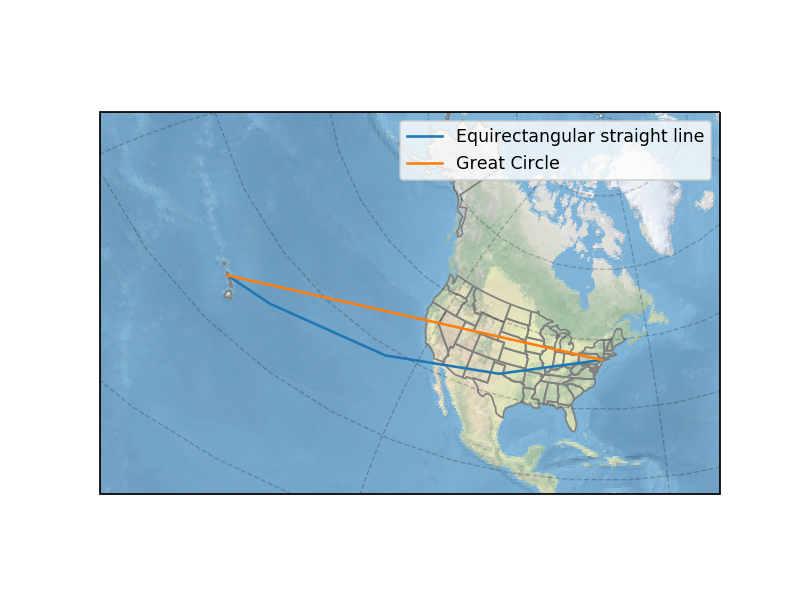

In [13]:
ny_stereo = ccrs.Stereographic(
    central_longitude = new_york['lon'],
    central_latitude = new_york['lat'])

plt.figure()
ax = plt.axes(projection=ny_stereo)
ax.set_extent([-170, -50, 10, 80])

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()
ax.add_feature(cartopy.feature.STATES, edgecolor='gray')
new_york_to_honolulu(ax)

# To draw the curvy lines better, the crs has to be subclassed

<IPython.core.display.Javascript object>


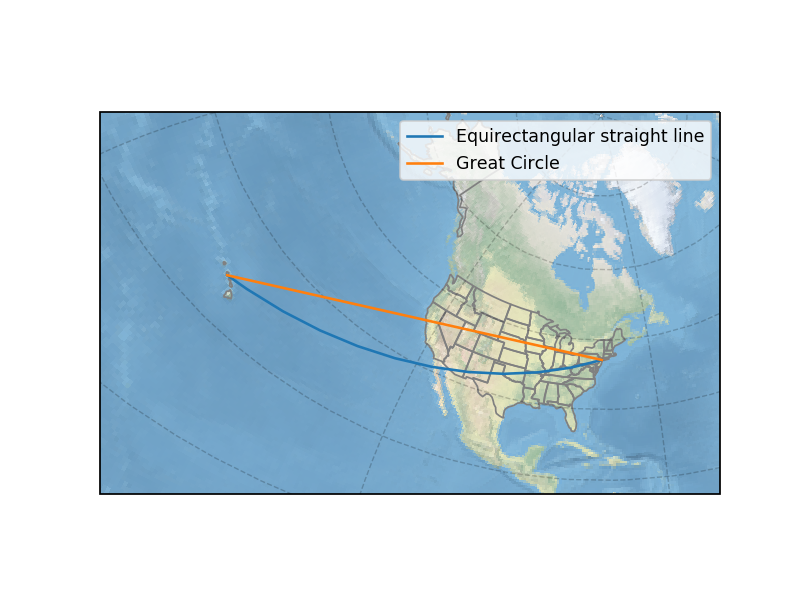

In [14]:
class HigherResStereo(ccrs.Stereographic):
    @property
    def threshold(self):
        # Give the interpolation 10x more fidelity
        return super().threshold / 10
    
ny_stereo = HigherResStereo(
    central_longitude = new_york['lon'],
    central_latitude = new_york['lat'])

plt.figure()
ax = plt.axes(projection=ny_stereo)
ax.set_extent([-170, -50, 10, 80])

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()
ax.add_feature(cartopy.feature.STATES, edgecolor='gray')
new_york_to_honolulu(ax)

# Draw a map with Phileas Fogg's route around the world in 80 days

In [15]:
# Some approximate locations of each of the cities are provided.
places = {'London': {'lon': -0.1278, 'lat': 51.5074},
          'Suez': {'lon': 32.5498, 'lat': 29.9668},
          'Bombay': {'lon': 72.8777, 'lat': 19.0760},
          'Calcutta': {'lon': 88.3639, 'lat': 22.5726},
          'Hong Kong': {'lon': 114.1095, 'lat': 22.3964},
          'Yokohama': {'lon': 139.6380, 'lat': 35.4437},
          'San Fransisco': {'lon': -122.4194, 'lat': 37.7749},
          'New York City': {'lon': -74.0060, 'lat': 40.7128},
         }

In [30]:
places.keys()

dict_keys(['London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong', 'Yokohama', 'San Fransisco', 'New York City'])

In [41]:
from_city = [key for key in places.keys()]
from_city

['London',
 'Suez',
 'Bombay',
 'Calcutta',
 'Hong Kong',
 'Yokohama',
 'San Fransisco',
 'New York City']

In [44]:
to_city = [key for key in places.keys()]
to_city.append(to_city[0])
to_city = to_city[1:]
to_city

['Suez',
 'Bombay',
 'Calcutta',
 'Hong Kong',
 'Yokohama',
 'San Fransisco',
 'New York City',
 'London']

In [45]:
for src, dst in zip(from_city, to_city):
    print(src, ":", dst)

London : Suez
Suez : Bombay
Bombay : Calcutta
Calcutta : Hong Kong
Hong Kong : Yokohama
Yokohama : San Fransisco
San Fransisco : New York City
New York City : London


<IPython.core.display.Javascript object>


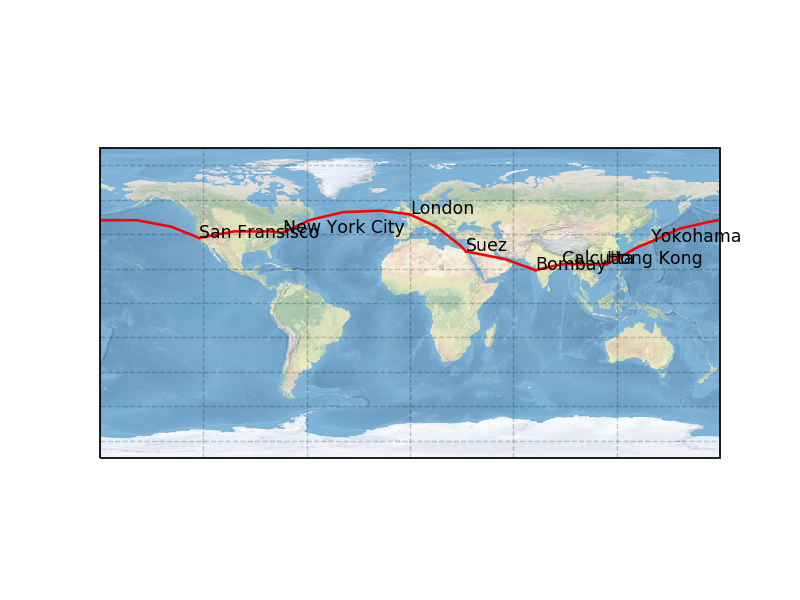

In [51]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()

for src, dst in zip(from_city, to_city):
    ax.plot([places[src]['lon'], places[dst]['lon']],
            [places[src]['lat'], places[dst]['lat']], 
            transform=ccrs.Geodetic(),
            label="%s->%s" % (src, dst),
            color="red"           )
    ax.annotate(s=src, xy = [places[src]['lon'], places[src]['lat']])
    
#ax.legend()

# Figure out how to geolocate the wikipedia image with Fogg's journey
Exercise 2.3: Navigate to the cartopy documentation for the Robinson projection. 
Draw a Robinson map (with coastlines) that represents the 
"centered on the meridian circa 11°15' (11.25 degrees) to east from 
Greenwich Prime Meridian" part of this definition.

<IPython.core.display.Javascript object>


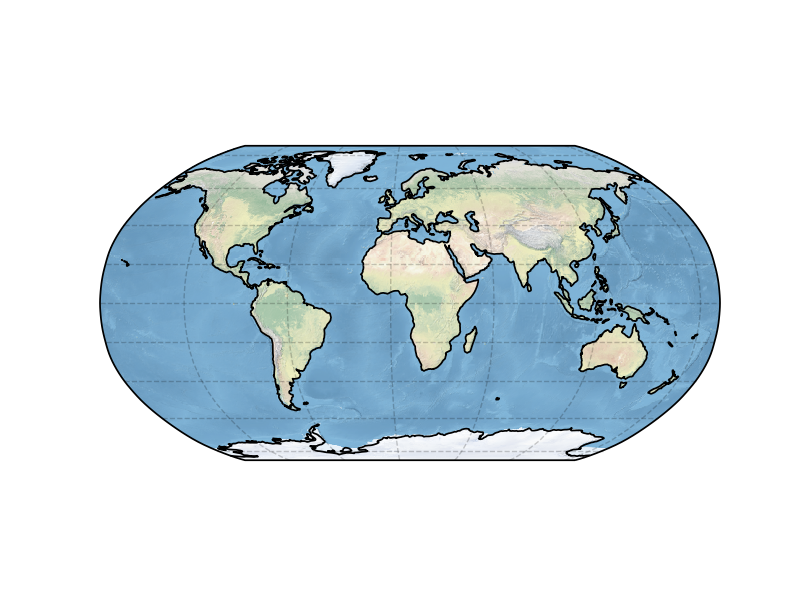

In [54]:
plt.figure()
ax = plt.axes(projection=ccrs.Robinson(central_longitude=11.25))

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()
ax.coastlines()

<IPython.core.display.Javascript object>


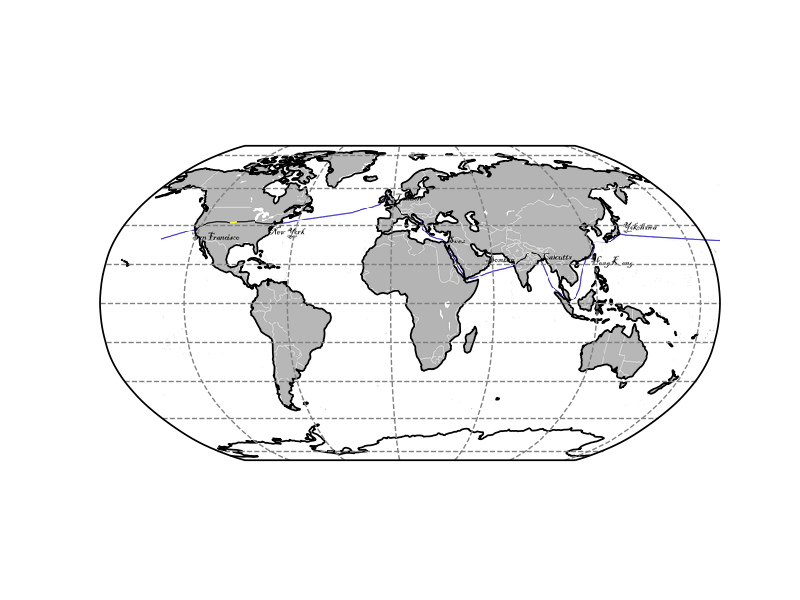

In [62]:
# [xmin, xmax,
#  ymin, ymax] Are these in projected meteres?
extent = [-13636707, 17044670, 
          -6308712, 8565930]

plt.figure()

rob = ccrs.Robinson(central_longitude=11.25)
ax = plt.axes(projection=rob)

ax.gridlines(color='gray', linestyle='--')
ax.coastlines()
img = plt.imread('/Users/brodzik/cartopy-tutorial/resources/640px-Around_the_World_in_Eighty_Days_map.png')
#ax.imshow(img, transform=rob)
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()